---

### **Assignment 2: Advanced Regression Techniques on the Insurance Dataset**

#### **Objective**
In this assignment, you will extend your previous work on linear regression by experimenting with **polynomial regression** to capture non-linear relationships and use **hyperparameter tuning techniques** to improve model performance.

---

### **Instructions**

#### 🔹 **Part 1: Polynomial Regression (10 Marks)**
1. Use the same **insurance dataset** from Assignment 1.
2. Perform **feature engineering** to include **polynomial features** (e.g., age², BMI², age × BMI, etc.).
3. Fit a **Polynomial Regression** model using `sklearn`'s `PolynomialFeatures` and `LinearRegression`.
4. Compare the performance of the polynomial regression model with your previous linear regression model using:
   - R² score
   - RMSE or MAE
   - Train vs. Test performance
5. Comment on **overfitting/underfitting**, if any.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/insurance.csv')

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex_LabelEncoder'] = le.fit_transform(df['sex'])
df['smoker_LabelEncoder'] = le.fit_transform(df['smoker'])
df['region_LabelEncoder'] = le.fit_transform(df['region'])

In [18]:
df.drop(['sex','smoker','region'],inplace=True,axis=1)

In [19]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
poly = PolynomialFeatures(degree=2)

In [22]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [23]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [24]:
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

In [25]:
y_test_pred_poly = y_test_pred

In [26]:
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [27]:
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, X_train.shape[0], X_train_poly.shape[1] - 1)

In [28]:
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, X_test.shape[0], X_test_poly.shape[1] - 1)

In [29]:
print(f"\n🔹 Training Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\n🔹 Test Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


🔹 Training Performance:
Mean Absolute Error (MAE): $2926.09
Root Mean Squared Error (RMSE): $4797.89
R-squared (R²): 0.84
Adjusted R-squared (Adj. R²): 0.84

🔹 Test Performance:
Mean Absolute Error (MAE): $2730.32
Root Mean Squared Error (RMSE): $4531.07
R-squared (R²): 0.87
Adjusted R-squared (Adj. R²): 0.85


#### 🔹 **Part 2: Regularization (Ridge and Lasso) (10 Marks)**
1. Apply **Ridge** and **Lasso** regression to the polynomial features.
2. Use **cross-validation** to evaluate model performance.
3. Explain the effect of **regularization** in controlling overfitting, and compare model coefficients.




🔹 Regularization Performance:
Ridge Test R²: 0.8676
Lasso Test R²: 0.8678


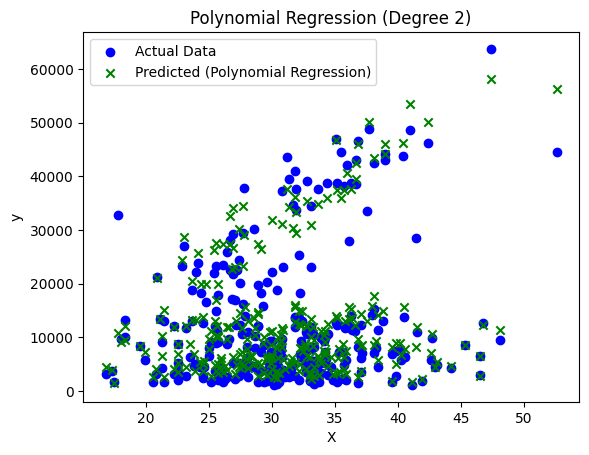

In [35]:
ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=1.0, max_iter=10000))
])

ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

ridge_score = ridge_pipeline.score(X_test, y_test)
lasso_score = lasso_pipeline.score(X_test, y_test)

print("\n🔹 Regularization Performance:")
print(f"Ridge Test R²: {ridge_score:.4f}")
print(f"Lasso Test R²: {lasso_score:.4f}")

plt.scatter(X_test.iloc[:,1], y_test, color='blue', label='Actual Data')
plt.scatter(X_test.iloc[:,1], y_test_pred.flatten(), color='green', marker='x', label='Predicted (Polynomial Regression)')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title(f"Polynomial Regression (Degree {2})")
plt.show()

#### 🔹 **Part 3: Hyperparameter Tuning (10 Marks )**
1. Use `GridSearchCV` or `RandomizedSearchCV` to find the optimal value of:
   - `alpha` (regularization strength) for Ridge/Lasso
   - Polynomial **degree**
2. Evaluate and report the best combination of hyperparameters.
3. Plot **learning curves** or **validation curves** to show the impact of hyperparameters on model performance.


In [37]:
# Lasso Pipeline
lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
        ('lasso_reg', Lasso(max_iter=10000))
        ])

        # Grid
param_grid_lasso = {
            'poly_features__degree': [1, 2, 3],
                'lasso_reg__alpha': [0.01, 0.1, 1, 10, 100]
                }

                # Grid Search
lasso_grid = GridSearchCV(lasso_pipe, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best Lasso CV Score:", lasso_grid.best_score_)

Best Lasso Parameters: {'lasso_reg__alpha': 10, 'poly_features__degree': 2}
Best Lasso CV Score: 0.8288436188018802


In [38]:
# Ridge Pipeline
ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
        ('ridge_reg', Ridge())
        ])

        # Grid to search
param_grid_ridge = {
            'poly_features__degree': [1, 2, 3],
                'ridge_reg__alpha': [0.01, 0.1, 1, 10, 100]
                }

                # Grid Search
ridge_grid = GridSearchCV(ridge_pipe, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Ridge CV Score:", ridge_grid.best_score_)

Best Ridge Parameters: {'poly_features__degree': 2, 'ridge_reg__alpha': 0.01}
Best Ridge CV Score: 0.8288046661709668



🔹 Best Ridge Model:
Best Params: {'poly__degree': 2, 'ridge__alpha': 1}
Best CV Score: 0.8288


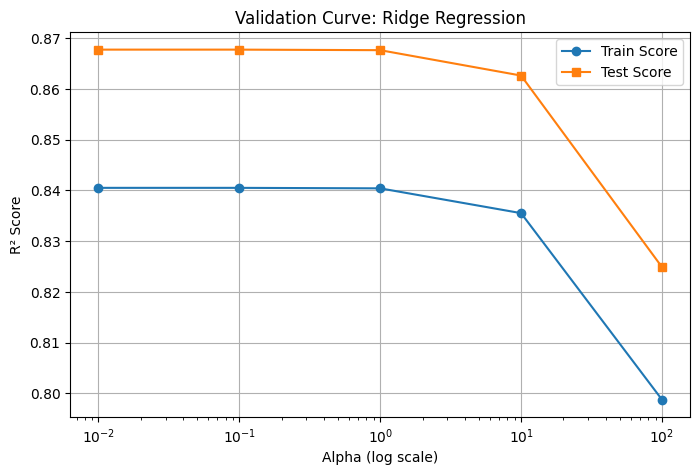

In [33]:
param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
]), param_grid, cv=5, scoring='r2')

ridge_grid.fit(X_train, y_train)

print("\n🔹 Best Ridge Model:")
print(f"Best Params: {ridge_grid.best_params_}")
print(f"Best CV Score: {ridge_grid.best_score_:.4f}")

# 🔹 Validation Curve for Ridge alpha
alphas = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(alphas, train_scores, label="Train Score", marker='o')
plt.plot(alphas, test_scores, label="Test Score", marker='s')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Validation Curve: Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

#### 🔹 **Part 4: Final Model Evaluation (10 Marks)**
1. Select the best model based on cross-validation results.
2. Evaluate it on the **test set** and compare with your previous models.
3. Provide a short summary: Which model worked best? Why?

---

In [36]:
final_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('ridge_reg', Ridge(alpha=0.1))
        ])

        # Fit on training data
final_model.fit(X_train, y_train)

        # Predict on test data
y_pred_test = final_model.predict(X_test)

        # Evaluate
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")

Test R²: 0.8678
Test RMSE: 20522690.48
Test MAE: 2730.12


In [41]:
# Set up grid search
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print(f"Polynomial Regression without regularization: Test R² = {r2_test:.4f}")
print("Ridge with alpha = 0.01 and polynomial degree = 2, gave the best results.")

Best Parameters from GridSearchCV: {'poly__degree': 2, 'ridge__alpha': 1}
Polynomial Regression without regularization: Test R² = 0.8678
Ridge with alpha = 0.01 and polynomial degree = 2, gave the best results.


### **Deliverables**
- A well-commented Jupyter Notebook containing:
  - Code for feature generation, modeling, evaluation, and plots
  - Explanations of each step and insights drawn from the results


---


### **Optional Bonus Tasks**
- Try using `PolynomialFeatures(interaction_only=True)`
- Visualize how regularization affects coefficients (bar plot of weights)
- Try using `Pipeline` for clean model building

---